In [2]:
from __future__ import print_function

from evo.tools import log
log.configure_logging()

In [54]:
from evo.tools import plot
from evo.tools.plot import PlotMode
from evo.core.metrics import PoseRelation, Unit
from evo.tools.settings import SETTINGS
import numpy as np
# temporarily override some package settings
SETTINGS.plot_figsize = [6, 6]
SETTINGS.plot_split = True
SETTINGS.plot_usetex = False

# magic plot configuration
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# interactive widgets configuration
import ipywidgets

check_opts_ape = {"align": False, "correct_scale": False, "show_plot": True}
check_boxes_ape=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_ape.items()]
check_opts_rpe = {"align": False, "correct_scale": False, "all_pairs": False, "show_plot": True}
check_boxes_rpe=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_rpe.items()]
delta_input = ipywidgets.FloatText(value=1.0, description='delta', disabled=False, color='black')
delta_unit_selector=ipywidgets.Dropdown(
    options={u.value: u for u in Unit if u is not Unit.seconds},
    value=Unit.frames, description='delta_unit'
)
plotmode_selector=ipywidgets.Dropdown(
    options={p.value: p for p in PlotMode},
    value=PlotMode.xy, description='plot_mode'
)
pose_relation_selector=ipywidgets.Dropdown(
    options={p.value: p for p in PoseRelation},
    value=PoseRelation.translation_part, description='pose_relation'
)

In [5]:
from evo.tools import file_interface
from evo.core import sync

In [6]:
import os
import evo.main_ape as main_ape
import evo.common_ape_rpe as common
import pandas as pd

In [184]:
scales = [0.017, 0.015, 0.075, 0.017]
textures = ['asphalt_led', 'concrete_ours_picture', 'concrete_ours_vid','wood']
trajectories = ['layp', 'squircle', 'sin2','lisajous']
algorithms = ['SIMSLAM', 'ORBSLAM', 'OPENVSLAM']
#texture = 'asphalt_led'
#trajectory = 'sin2'

resultados = {}


i = 0

for j, texture in enumerate(textures):
    for trajectory in trajectories:
        row = []
        scale = scales[j]
        image_source = 'C:\\Users\\jrodri56\\Documents\\GitHub\\simslam2d\\data\\test1\\'+texture+'\\'+trajectory
            
        traj_ref = file_interface.read_kitti_poses_file(os.path.join(image_source, trajectory+'.txt'))
        traj_opv = file_interface.read_kitti_poses_file(os.path.join(image_source, 'OPENVSLAM'+'.txt'))
        traj_orb = file_interface.read_kitti_poses_file(os.path.join(image_source, 'ORBSLAM'+'.txt'))
        traj_sim = file_interface.read_kitti_poses_file(os.path.join(image_source, 'SIMSLAM'+'.txt'))
        min_pose = 3000-traj_orb.num_poses
        max_pose = traj_opv.num_poses
        
        
        #print('orb_poses:', traj_orb.num_poses)
        #print('opv_poses:', traj_opv.num_poses)
        traj_ref._poses_se3 = traj_ref._poses_se3[min_pose:max_pose]
        traj_orb._poses_se3 = traj_orb._poses_se3[:max_pose-min_pose]
        traj_opv._poses_se3 = traj_opv._poses_se3[min_pose:]
        traj_sim._poses_se3 = traj_sim._poses_se3[min_pose:max_pose]
        
        result_orb = main_ape.ape(traj_ref, traj_orb, est_name='ORBSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
        result_opv = main_ape.ape(traj_ref, traj_opv, est_name='OPENVSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
        result_sim = main_ape.ape(traj_ref, traj_sim, est_name='SIMSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
        
        if trajectory in ['squircle', 'sin2']:
            ttype = 'OPEN'
        else:
            ttype = 'CLOSED'
        
        
        row.append('ORBSLAM')
        row.append(texture)
        row.append(trajectory)
        row.append(ttype)
        row.append(result_orb.stats['mean']*scale)
        row.append(result_orb.stats['max']*scale)
        row.append(traj_orb._poses_se3)
        
        resultados[i] = row
        
        i+=1
        row = []
        row.append('OPENVSLAM')
        row.append(texture)
        row.append(trajectory)
        row.append(ttype)
        row.append(result_opv.stats['mean']*scale)
        row.append(result_opv.stats['max']*scale)
        row.append(traj_opv._poses_se3)
        
        resultados[i] = row
        
        i+=1
        row = []
        row.append('STREETMAP')
        row.append(texture)
        row.append(trajectory)
        row.append(ttype)
        row.append(result_sim.stats['mean']*scale)
        row.append(result_sim.stats['max']*scale)
        row.append(traj_sim._poses_se3)
        
        resultados[i] = row
        
        i+=1



APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	240.521798
      mean	64.102307
    median	43.488307
       min	8.884614
      rmse	83.111631
       sse	20701907.105335
       std	52.900260

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	74.846213
      mean	17.957576
    median	17.603106
       min	0.776647
      rmse	20.560121
       sse	1266887.534726
       std	10.012194

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	236.360055
      mean	71.841918
    median	55.924090
       min	8.458723
      rmse	91.706009
       sse	25204746.449550
       std	56.997640

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	82.672049
      mean	26.937275
    median	26.157320
       min	3.770368
      rmse	29.824327
       sse	2667581.866192
       std	12.801316

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	108.041167
      mean	29.498888
    median	27.199713

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	205.213186
      mean	76.481560
    median	74.350404
       min	18.147197
      rmse	86.121639
       sse	22250809.860663
       std	39.591761

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	165.946820
      mean	62.828211
    median	50.566230
       min	27.493332
      rmse	71.871501
       sse	15496537.885096
       std	34.901698

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	169.423072
      mean	63.750552
    median	54.452968
       min	16.510364
      rmse	73.387351
       sse	16157109.813623
       std	36.353409

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	102.219015
      mean	36.814689
    median	31.908277
       min	1.782261
      rmse	43.661149
       sse	5718887.832208
       std	23.472849

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	503.809077
      mean	182.963365
    median	14

In [185]:
resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['algorithm', 'texture', 'trajectory', 'type', 'mean', 'max', 'traj'])

In [168]:
import evo.main_ape as main_ape
import evo.common_ape_rpe as common

count = 0
results = []

def callback_ape(pose_relation, align, correct_scale, plot_mode, show_plot):
    global results, count
    est_name="APE Test #{}".format(count)
    
    result = main_ape.ape(traj_ref, traj_sim, est_name=est_name,
                          pose_relation=pose_relation, align=align, correct_scale=correct_scale)
    count += 1
    results.append(result)
    
    if show_plot:
        fig = plt.figure()
        ax = plot.prepare_axis(fig, plot_mode)
        plot.traj(ax, plot_mode, traj_ref, style="--", alpha=0.5)
        plot.traj_colormap(
            ax, result.trajectories[est_name], result.np_arrays["error_array"], plot_mode,
            min_map=result.stats["min"], max_map=result.stats["max"])
    
_ = ipywidgets.interact_manual(callback_ape, pose_relation=pose_relation_selector, plot_mode=plotmode_selector,
                               **{c.description: c.value for c in check_boxes_ape})

interactive(children=(Dropdown(description='pose_relation', index=1, options={'full transformation': <PoseRela…

<IPython.core.display.Javascript object>


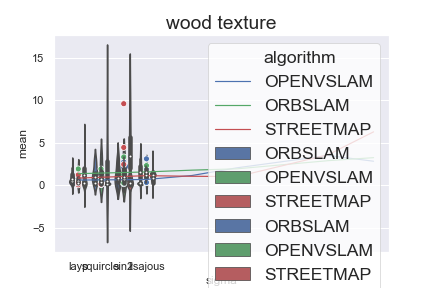

Text(0.5, 1.0, 'Overall performance')

In [10]:
me = []
for texture in textures:
    me.append(resultados[resultados['texture'] == texture]['mean'].mean())
plt.scatter(textures, me)
plt.title('Overall performance')

In [11]:
orbslam = 45
openvslam = 46
simslam = 44

resultados

,algorithm,texture,trajectory,type,mean,max,traj
0,ORBSLAM,asphalt_led,layp,CLOSED,1.089739,4.088871,"[[[0.99999845, -0.001735651, -3.8761e-05, 0.00..."
1,OPENVSLAM,asphalt_led,layp,CLOSED,0.305279,1.272386,"[[[0.999998546, -0.00170414903, 6.00342585e-05..."
2,STREETMAP,asphalt_led,layp,CLOSED,1.221313,4.018121,"[[[0.999999, 0.001683, 0.0, 0.440712], [-0.001..."
3,ORBSLAM,asphalt_led,squircle,OPEN,0.457934,1.405425,"[[[1.0, 7.2421e-05, -1.862e-05, 8.4199e-05], [..."
4,OPENVSLAM,asphalt_led,squircle,OPEN,0.501481,1.836700,"[[[1.0, 8.18715146e-06, -1.69610327e-07, 2.716..."
5,STREETMAP,asphalt_led,squircle,OPEN,0.287742,1.074024,"[[[1.0, -3e-06, 0.0, -0.010518], [3e-06, 1.0, ..."
6,ORBSLAM,asphalt_led,sin2,OPEN,0.514327,1.272735,"[[[0.999940813, 0.010875361, 6.7927e-05, 3.291..."
7,OPENVSLAM,asphalt_led,sin2,OPEN,0.452708,1.169403,"[[[0.999941074, 0.0108554925, 8.73447578e-05, ..."
8,STREETMAP,asphalt_led,sin2,OPEN,0.057562,0.134017,"[[[0.999943, -0.01065, 0.0, 0.039371], [0.0106..."
9,ORBSLAM,asphalt_led,lisajous,CLOSED,0.267024,7.140222,"[[[0.999993861, -0.003511045, -6.0528e-05, -3...."


In [12]:
sns.violinplot(x = 'texture', y = 'mean', hue = 'algorithm', data = resultados)

In [13]:
sns.violinplot(x = 'trajectory', y = 'mean', hue = 'algorithm', data = resultados)

In [14]:
sns.scatterplot(x = 'texture', y = 'mean', hue = 'algorithm', data = resultados)

<IPython.core.display.Javascript object>


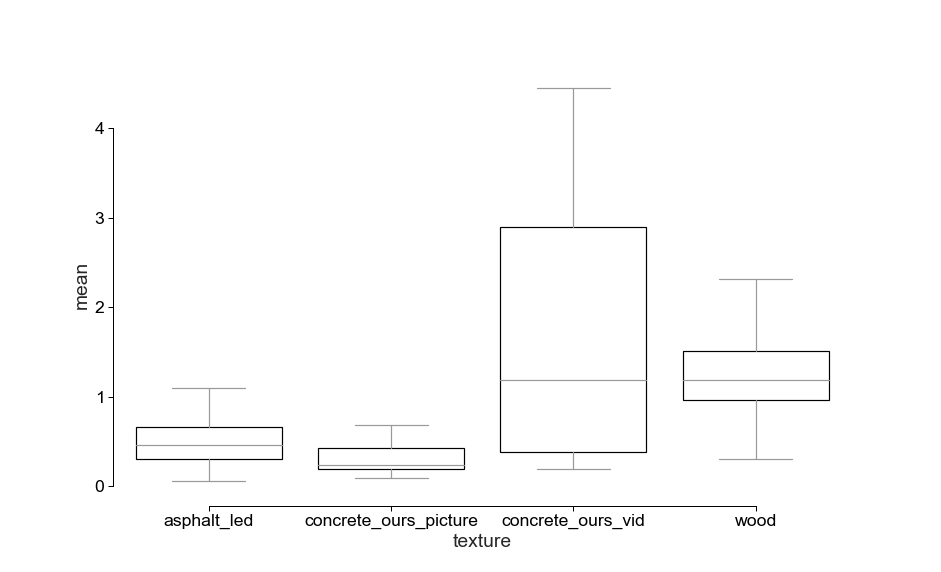

In [108]:

f, ax = plt.subplots(figsize=(3, 5))

sns.boxplot(x = 'texture', y = 'mean',  data = resultados, showfliers = False, color = 'white')
sns.set_style('ticks')
sns.set_context('paper', font_scale=2)
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')

#ax = sns.boxplot(x="test1", y="test2", data=dataset, color='white', width=.5)
sns.despine(offset=5, trim=True)

In [36]:
print(pd.pivot_table(resultados, values = 'mean', columns = 'texture', index = ['algorithm', 'trajectory']).to_latex())

\begin{tabular}{llrrrr}
\toprule
          & texture &  asphalt\_led &  concrete\_ours\_picture &  concrete\_ours\_vid &      wood \\
algorithm & trajectory &              &                        &                    &           \\
\midrule
OPENVSLAM & layp &     0.305279 &               0.207123 &           0.321986 &  0.306276 \\
          & lisajous &     1.922253 &               1.928017 &           0.282175 &  1.250851 \\
          & sin2 &     0.452708 &               0.679631 &           1.248665 &  2.315854 \\
          & squircle &     0.501481 &               0.196746 &           3.330137 &  1.083759 \\
ORBSLAM & layp &     1.089739 &               0.238806 &           0.404525 &  2.030671 \\
          & lisajous &     0.267024 &               0.113512 &           0.186551 &  0.329815 \\
          & sin2 &     0.514327 &               0.337707 &           1.127603 &  3.110377 \\
          & squircle &     0.457934 &               0.871501 &           2.745766 &  1.068080 \\


In [42]:
pd.pivot_table(resultados, values = 'mean',  index = ['texture'], aggfunc = np.mean)

,mean
texture,
asphalt_led,0.615910
concrete_ours_picture,0.446344
concrete_ours_vid,2.223505
wood,1.322123


In [17]:
scales = [0.017, 0.015, 0.075, 0.017]
textures = ['concrete_ours_picture', 'wood']
trajectories = ['layp', 'squircle']
algorithms = ['SIMSLAM', 'ORBSLAM', 'OPENVSLAM']
sigmas= [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2, 3, 5]
#texture = 'asphalt_led'
#trajectory = 'sin2'

resultados2 = {}


i = 0

for j, texture in enumerate(textures):
    for trajectory in trajectories:
        for sigma in sigmas:
            row = []
            scale = scales[j]
            
            image_source = 'C:\\Users\\jrodri56\\Documents\\GitHub\\simslam2d\\data\\test2\\gaussian_blur\\'+str(sigma)+'\\'+texture+'\\'+trajectory
            
            if sigma == 0:
                    image_source = 'C:\\Users\\jrodri56\\Documents\\GitHub\\simslam2d\\data\\test1\\'+texture+'\\'+trajectory

            
            traj_ref = file_interface.read_kitti_poses_file(os.path.join(image_source, trajectory+'.txt'))
            traj_opv = file_interface.read_kitti_poses_file(os.path.join(image_source, 'OPENVSLAM'+'.txt'))
            traj_orb = file_interface.read_kitti_poses_file(os.path.join(image_source, 'ORBSLAM'+'.txt'))
            traj_sim = file_interface.read_kitti_poses_file(os.path.join(image_source, 'SIMSLAM'+'.txt'))
            #if traj_orb.num_poses <= traj_sim.num_poses:
            # 
            
            min_pose = 3000-traj_orb.num_poses
            #else:
            #    min_pose = 3000-traj_sim.num_poses
            max_pose = min(traj_opv.num_poses, traj_sim.num_poses)


            print('orb_poses:', traj_orb.num_poses)
            print('opv_poses:', traj_opv.num_poses)
            print('streetmap poses:', traj_sim.num_poses)

            traj_ref._poses_se3 = traj_ref._poses_se3[min_pose:max_pose]
            traj_orb._poses_se3 = traj_orb._poses_se3[:max_pose-min_pose]
            
            if traj_opv.num_poses == 3000:
                print('aqui es')
                traj_opv._poses_se3 = traj_opv._poses_se3[min_pose:max_pose]
            else:
                traj_opv._poses_se3 = traj_opv._poses_se3[min_pose:]
            
            if traj_sim.num_poses == 3000:
                traj_sim._poses_se3 = traj_sim._poses_se3[min_pose:max_pose]
            else:
                traj_sim._poses_se3 = traj_sim._poses_se3[min_pose:]
                
            print(texture, trajectory, sigma)
            print(traj_ref.num_poses, traj_orb.num_poses, traj_opv.num_poses, traj_sim.num_poses)
            
            #if traj_sim.num_poses <3000:
            #    traj_ref._poses_se3 = traj_ref._poses_se3[:traj_sim.num_poses]
            result_orb = main_ape.ape(traj_ref, traj_orb, est_name='ORBSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            result_opv = main_ape.ape(traj_ref, traj_opv, est_name='OPENVSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            result_sim = main_ape.ape(traj_ref, traj_sim, est_name='SIMSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            
            if trajectory in ['squircle', 'sin2']:
                ttype = 'OPEN'
            else:
                ttype = 'CLOSED'

            
            row.append('ORBSLAM')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_orb.stats['mean']*scale)
            row.append(result_orb.stats['max']*scale)
            row.append(sigma)
            #row.append(traj_orb._poses_se3)

            resultados2[i] = row

            i+=1
            row = []
            row.append('OPENVSLAM')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_opv.stats['mean']*scale)
            row.append(result_opv.stats['max']*scale)
            row.append(sigma)
            #row.append(traj_opv._poses_se3)

            resultados2[i] = row

            i+=1
            
            row = []
            row.append('STREETMAP')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_sim.stats['mean']*scale)
            row.append(result_sim.stats['max']*scale)
            row.append(sigma)
            #row.append(traj_sim._poses_se3)

            resultados2[i] = row

            i+=1



orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture layp 0
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	46.119391
      mean	15.920391
    median	15.653799
       min	6.187023
      rmse	17.073661
       sse	874238.219065
       std	6.168554

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	49.989282
      mean	13.808182
    median	12.694820
       min	2.798996
      rmse	15.496529
       sse	720187.096163
       std	7.033955

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	77.852733
      mean	16.096682
    median	11.153738
       min	3.565444
      rmse	21.752142
       sse	1418993.890451
       std	14.630533

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture layp 0.25
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	25.649745
      mean	10.032326
    median	9.843835
 

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture squircle 0.25
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	82.089983
      mean	31.587613
    median	19.968660
       min	6.561696
      rmse	38.485020
       sse	4441809.221215
       std	21.984529

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	72.691460
      mean	33.811235
    median	22.981089
       min	7.536474
      rmse	39.596573
       sse	4702097.943690
       std	20.607985

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	18.108577
      mean	7.591125
    median	6.127108
       min	0.054061
      rmse	8.652904
       sse	224543.379210
       std	4.153020

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture squircle 0.5
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	66.567998
      mean	31.951097
    median	2

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	205.483642
      mean	76.401378
    median	74.255336
       min	18.173457
      rmse	86.054337
       sse	22208641.257914
       std	39.600232

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
wood layp 0.5
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	268.797079
      mean	93.795861
    median	77.760314
       min	10.703366
      rmse	110.050547
       sse	36321257.460793
       std	57.562655

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	46.474379
      mean	16.672233
    median	16.282960
       min	3.429861
      rmse	18.077504
       sse	980061.649244
       std	6.988046

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	157.655251
      mean	34.197262
    median	19.113377
       min	4.649327
      rmse	45.513150
       sse	6212268.971547
       std	30.033216

orb_poses: 2999
opv_poses: 300

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	99.221514
      mean	34.906178
    median	34.402064
       min	1.085531
      rmse	40.044652
       sse	4809118.871514
       std	19.624803

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
wood squircle 0.75
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	231.753413
      mean	88.354094
    median	67.057894
       min	45.979806
      rmse	100.554417
       sse	30323461.032832
       std	48.007758

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	217.315697
      mean	78.776029
    median	61.894769
       min	32.973733
      rmse	90.385985
       sse	24500709.058952
       std	44.316627

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	108.043310
      mean	27.391978
    median	19.700626
       min	6.777803
      rmse	34.970762
       sse	3667639.701555
       std	21.740142

orb_poses: 2999
opv_pos

In [18]:
resultados2 = pd.DataFrame.from_dict(resultados2, orient='index', columns=['algorithm', 'texture', 'trajectory', 'type', 'mean', 'max','sigma'])

In [19]:
sns.boxplot(x = 'sigma', y = 'mean', data = resultados2, hue = 'texture')

In [52]:
wood_gb = pd.pivot_table(resultados2[(resultados2['texture']=='wood')], index = ['algorithm', 'sigma'], aggfunc=np.mean)
concrete_gb = pd.pivot_table(resultados2[(resultados2['texture']=='concrete_ours_picture')], index = ['algorithm', 'sigma'], aggfunc=np.mean)
wood_gb.reset_index(inplace = True)
concrete_gb.reset_index(inplace = True)

<IPython.core.display.Javascript object>


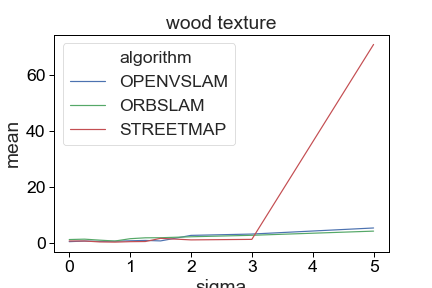

Text(0.5, 1.0, 'wood texture')

In [55]:
sns.lineplot(x = 'sigma', y = 'mean', data = wood_gb, hue = 'algorithm')
plt.title('wood texture')

<IPython.core.display.Javascript object>


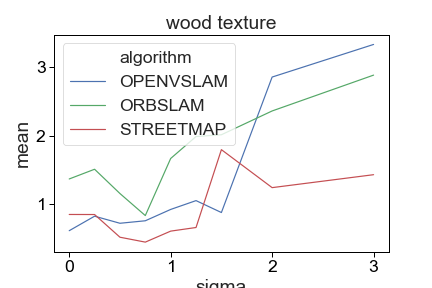

Text(0.5, 1.0, 'wood texture')

In [56]:
sns.lineplot(x = 'sigma', y = 'mean', data = wood_gb[wood_gb['sigma']!=5], hue = 'algorithm')
plt.title('wood texture')

In [23]:
sns.lineplot(x = 'sigma', y = 'mean', data = concrete_gb, hue = 'algorithm')
plt.title('concrete_ours_pic texture')

Text(0.5, 1.0, 'concrete_ours_pic texture')

In [24]:
scales = [0.017, 0.015, 0.075, 0.017]
textures = ['concrete_ours_picture', 'wood']
trajectories = ['layp', 'squircle']
algorithms = ['SIMSLAM', 'ORBSLAM', 'OPENVSLAM']
ks= [0, 3, 5, 7, 11, 13, 15, 19]
#texture = 'asphalt_led'
#trajectory = 'sin2'

resultados3 = {}


i = 0

for j, texture in enumerate(textures):
    for trajectory in trajectories:
        for k in ks:
            row = []
            scale = scales[j]
            
            image_source = 'C:\\Users\\jrodri56\\Documents\\GitHub\\simslam2d\\data\\test2\\motion_blur\\'+str(k)+'\\'+texture+'\\'+trajectory
            
            if k == 0:
                    image_source = 'C:\\Users\\jrodri56\\Documents\\GitHub\\simslam2d\\data\\test1\\'+texture+'\\'+trajectory

            
            traj_ref = file_interface.read_kitti_poses_file(os.path.join(image_source, trajectory+'.txt'))
            traj_opv = file_interface.read_kitti_poses_file(os.path.join(image_source, 'OPENVSLAM'+'.txt'))
            traj_orb = file_interface.read_kitti_poses_file(os.path.join(image_source, 'ORBSLAM'+'.txt'))
            traj_sim = file_interface.read_kitti_poses_file(os.path.join(image_source, 'SIMSLAM'+'.txt'))
            #if traj_orb.num_poses <= traj_sim.num_poses:
            # 
            
            min_pose = 3000-traj_orb.num_poses
            #else:
            #    min_pose = 3000-traj_sim.num_poses
            max_pose = min(traj_opv.num_poses, traj_sim.num_poses)


            print('orb_poses:', traj_orb.num_poses)
            print('opv_poses:', traj_opv.num_poses)
            print('streetmap poses:', traj_sim.num_poses)

            traj_ref._poses_se3 = traj_ref._poses_se3[min_pose:max_pose]
            traj_orb._poses_se3 = traj_orb._poses_se3[:max_pose-min_pose]
            
            if traj_opv.num_poses == 3000 or traj_opv.num_poses>traj_sim.num_poses:
                print('aqui es')
                traj_opv._poses_se3 = traj_opv._poses_se3[min_pose:max_pose]
            else:
                traj_opv._poses_se3 = traj_opv._poses_se3[min_pose:]
            
            if traj_sim.num_poses == 3000:
                traj_sim._poses_se3 = traj_sim._poses_se3[min_pose:max_pose]
            else:
                traj_sim._poses_se3 = traj_sim._poses_se3[min_pose:]
                
            print(texture, trajectory, k)
            print(traj_ref.num_poses, traj_orb.num_poses, traj_opv.num_poses, traj_sim.num_poses)
            
            #if traj_sim.num_poses <3000:
            #    traj_ref._poses_se3 = traj_ref._poses_se3[:traj_sim.num_poses]
            result_orb = main_ape.ape(traj_ref, traj_orb, est_name='ORBSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            result_opv = main_ape.ape(traj_ref, traj_opv, est_name='OPENVSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            result_sim = main_ape.ape(traj_ref, traj_sim, est_name='SIMSLAM',pose_relation=PoseRelation.translation_part, align=True, correct_scale=True)
            
            if trajectory in ['squircle', 'sin2']:
                ttype = 'OPEN'
            else:
                ttype = 'CLOSED'

            
            row.append('ORBSLAM')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_orb.stats['mean']*scale)
            row.append(result_orb.stats['max']*scale)
            row.append(k)
            #row.append(traj_orb._poses_se3)

            resultados3[i] = row

            i+=1
            row = []
            row.append('OPENVSLAM')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_opv.stats['mean']*scale)
            row.append(result_opv.stats['max']*scale)
            row.append(k)
            #row.append(traj_opv._poses_se3)

            resultados3[i] = row

            i+=1
            
            row = []
            row.append('STREETMAP')
            row.append(texture)
            row.append(trajectory)
            row.append(ttype)
            row.append(result_sim.stats['mean']*scale)
            row.append(result_sim.stats['max']*scale)
            row.append(k)
            #row.append(traj_sim._poses_se3)

            resultados3[i] = row

            i+=1



orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture layp 0
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	46.119391
      mean	15.920391
    median	15.653799
       min	6.187023
      rmse	17.073661
       sse	874238.219065
       std	6.168554

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	49.989282
      mean	13.808182
    median	12.694820
       min	2.798996
      rmse	15.496529
       sse	720187.096163
       std	7.033955

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	77.852733
      mean	16.096682
    median	11.153738
       min	3.565444
      rmse	21.752142
       sse	1418993.890451
       std	14.630533

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture layp 3
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	45.107888
      mean	10.333370
    median	9.164806
    

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	43.138264
      mean	13.184536
    median	11.152824
       min	1.141231
      rmse	15.915086
       sse	759616.560935
       std	8.913920

orb_poses: 2999
opv_poses: 3000
streetmap poses: 3000
aqui es
concrete_ours_picture squircle 7
2999 2999 2999 2999
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	248.277690
      mean	94.257858
    median	59.560472
       min	22.277527
      rmse	115.355939
       sse	39907671.109709
       std	66.501495

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	156.322960
      mean	68.767810
    median	45.865846
       min	19.020495
      rmse	81.426494
       sse	19884191.429179
       std	43.603466

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	56.874536
      mean	23.132089
    median	13.093465
       min	1.649548
      rmse	29.056083
       sse	2531923.619157
       std	17.583015

orb_poses: 2

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	657.793874
      mean	167.360278
    median	135.683450
       min	21.979351
      rmse	206.840200
       sse	119449768.150030
       std	121.545899

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	1451.294152
      mean	515.882532
    median	364.779276
       min	195.025339
      rmse	610.310157
       sse	1039959938.884411
       std	326.103819

orb_poses: 2768
opv_poses: 3000
streetmap poses: 2999
aqui es
wood layp 15
2767 2767 2767 2767
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	829.074758
      mean	221.113265
    median	171.047588
       min	20.861900
      rmse	277.760911
       sse	213477158.996031
       std	168.107251

APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	948.857414
      mean	253.289887
    median	188.961391
       min	24.560850
      rmse	322.483953
       sse	287756655.707900
       std	199.599933

AP

In [25]:
resultados3 = pd.DataFrame.from_dict(resultados3, orient='index', columns=['algorithm', 'texture', 'trajectory', 'type', 'mean', 'max','sigma'])

In [59]:
wood_mb = pd.pivot_table(resultados3[(resultados3['texture']=='wood')], index = ['algorithm', 'sigma'], aggfunc=np.mean)
concrete_mb = pd.pivot_table(resultados3[(resultados3['texture']=='concrete_ours_picture')], index = ['algorithm', 'sigma'], aggfunc=np.mean)
wood_mb.reset_index(inplace = True)
concrete_mb.reset_index(inplace = True)

In [27]:
sns.lineplot(x = 'sigma', y = 'mean', data = wood_gb, hue = 'algorithm')
plt.title('wood texture')

Text(0.5, 1.0, 'wood texture')

<IPython.core.display.Javascript object>


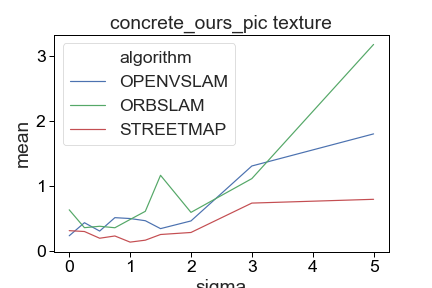

Text(0.5, 1.0, 'concrete_ours_pic texture')

In [72]:
sns.lineplot(x = 'sigma', y = 'mean', data = concrete_gb, hue = 'algorithm')
plt.title('concrete_ours_pic texture')

<IPython.core.display.Javascript object>


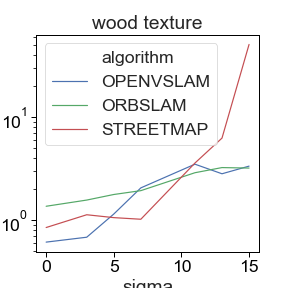

Text(0.5, 1.0, 'wood texture')

In [82]:
f, ax = plt.subplots(figsize=(4, 4))

ax.set( yscale="log")
sns.lineplot(x = 'sigma', y = 'mean', data = wood_mb[wood_mb['sigma']<=15], hue = 'algorithm', ax =ax)
plt.title('wood texture')

<IPython.core.display.Javascript object>


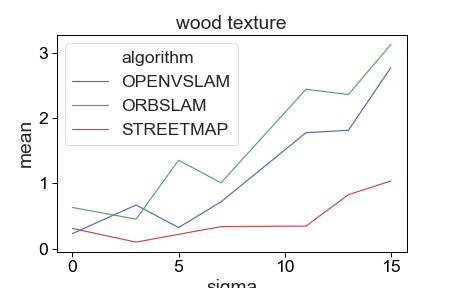

Text(0.5, 1.0, 'wood texture')

In [84]:
f, ax = plt.subplots(figsize=(4, 4))

#ax.set( yscale="log")
sns.lineplot(x = 'sigma', y = 'mean', data = concrete_mb[concrete_mb['sigma']<=15], hue = 'algorithm',ax = ax)
plt.title('wood texture')

In [61]:
pd.pivot_table(wood_mb, values = 'mean',  index = ['sigma'], columns = ['algorithm']).to_csv('k_wood.csv')

In [62]:
pd.pivot_table(concrete_mb, values = 'mean',  index = ['sigma'], columns = ['algorithm']).to_csv('k_concrete.csv')

In [116]:
textura = 'wood'

subset = resultados[resultados.texture == textura ]['mean']

median = subset.median()
median

lq = subset.quantile(0.25)
uq = subset.quantile(0.75)

uw = median+1.5*(uq-lq)

lw = median-1.5*(uq-lq)
print( 'lower whisker=', lw)
print( ', lower quartile=', lq)
print( ',median= ',median)
print( ', upper quartile = ', uq)
print( ',upper whisker= ', uw)




lower whisker= 0.3604857145605038
, lower quartile= 0.9575221176954997
,median=  1.1821963558582658
, upper quartile =  1.5053292118940076
,upper whisker=  2.0039069971560277


In [186]:
trayectoria = 'squircle'

a = resultados[(resultados.trajectory == trayectoria) ]




for algo in ['ORBSLAM', 'OPENVSLAM',  'STREETMAP']:
    print(algo)
    subset = a[a.algorithm == algo]['mean']
    median = subset.median()
    lq = subset.quantile(0.25)
    uq = subset.quantile(0.75)

    uw = median+1.5*(uq-lq)

    lw = median-1.5*(uq-lq)
    print( 'lower whisker=', lw)
    print( ', lower quartile=', lq)
    print( ',median= ',median)
    print( ', upper quartile =', uq)
    print( ',upper whisker=', uw)



ORBSLAM
lower whisker= -0.10929737163104303
, lower quartile= 0.7681093200322662
,median=  0.9697903959817653
, upper quartile = 1.4875011651074717
,upper whisker= 2.0488781635945736
OPENVSLAM
lower whisker= -1.0374643947016207
, lower quartile= 0.42529734667556296
,median=  0.792620245031693
, upper quartile = 1.6453537731644388
,upper whisker= 2.6227048847650067
STREETMAP
lower whisker= -3.3859832135250207
, lower quartile= 0.2982253918801917
,median=  0.4637848230627645
, upper quartile = 2.8647374162720487
,upper whisker= 4.3135528596505495


In [181]:
a = resultados[(resultados.trajectory == trayectoria) ]


<IPython.core.display.Javascript object>


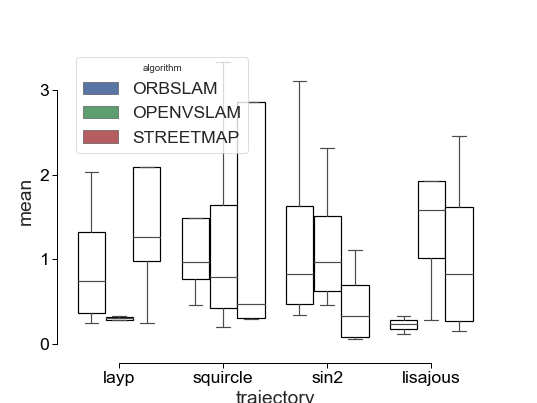

In [147]:
f, ax = plt.subplots(figsize=(3, 5))

sns.boxplot(x = 'trajectory', y = 'mean',  data = resultados, showfliers = False, hue = 'algorithm')
sns.set_style('ticks')
sns.set_context('paper', font_scale=2)
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')

#ax = sns.boxplot(x="test1", y="test2", data=dataset, color='white', width=.5)
sns.despine(offset=10, trim=True)

In [163]:
resultados[resultados.algorithm == 'OPENVSLAM']['mean'].median()

0.5905558469380947

In [166]:
pd.pivot_table(resultados, index = 'texture', values = 'mean', aggfunc=np.median)

,mean
texture,
asphalt_led,0.455321
concrete_ours_picture,0.240128
concrete_ours_vid,1.188134
wood,1.182196


In [182]:
resultados

,algorithm,texture,trajectory,type,mean,max,traj
0,ORBSLAM,concrete_ours_vid,squircle,OPEN,0.622374,1.802475,"[[[0.99970001, -0.024492022, -9.7686e-05, 5.20..."
1,OPENVSLAM,concrete_ours_vid,squircle,OPEN,0.754831,1.507642,"[[[0.999170238, -0.0407282399, -0.000214090826..."
2,STREETMAP,concrete_ours_vid,squircle,OPEN,2.171784,5.716858,"[[[0.999704, 0.024341, 0.0, 0.166105], [-0.024..."
